# Peer-graded Assignment: Segmenting and Clustering Neighborhoods in Toronto

## import libraries to the project

In [38]:
# !pip install numpy==1.19.5
!pip3 install pandas==1.2.3
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.cm as cm
import matplotlib.colors as colors
pd.__version__

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


'1.2.3'

Set pandas display options and request a list of postal codes of Canada.

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

req = requests.get("https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&diff=968796333&oldid=968782994")
soup = BeautifulSoup(req.content,'lxml')
table = soup.find_all('table')[1] 
df = pd.read_html(str(table))

Drop rows which contian "Not assigned" as the project intent to ignore them.

In [3]:
neighborhood=pd.DataFrame(df[0])
neighborhood_dropNass = neighborhood.loc[neighborhood["Borough"] != "Not assigned",:]

print(neighborhood_dropNass.shape)

neighborhood_dropNass.head(5)

(103, 3)


Postal Code           Borough                                Neighbourhood
2         M3A        North York                                    Parkwoods
3         M4A        North York                             Victoria Village
4         M5A  Downtown Toronto                    Regent Park, Harbourfront
5         M6A        North York             Lawrence Manor, Lawrence Heights
6         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

Merge Neighbourhood with the same postal code

In [4]:
Toronto_neighborhood = neighborhood_dropNass.groupby("Postal Code").agg({'Borough':'first','Neighbourhood': ', '.join}).reset_index()

Toronto_neighborhood.shape

(103, 3)

## Get Latitude and Longtitude using geocoder

In [6]:
# !pip3 install geocoder
import geocoder # import geocoder

latitude = []
longitude = []

for postal_code in Toronto_neighborhood['Postal Code']:
    lat_lng_coords = None
    print(postal_code)
    # loop until you get the coordinates
    while(lat_lng_coords is None):
      g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
      lat_lng_coords = g.latlng

    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])

Toronto_neighborhood['Lat'] = latitude
Toronto_neighborhood['Long'] = longitude

Toronto_neighborhood.head()

In [7]:
geo_coor = pd.read_csv("Geospatial_Coordinates.csv")

Toronto_neighborhood_data = pd.merge(Toronto_neighborhood, geo_coor, how="inner", on=["Postal Code"])
Toronto_neighborhood_data

Postal Code           Borough  \
0           M1B       Scarborough   
1           M1C       Scarborough   
2           M1E       Scarborough   
3           M1G       Scarborough   
4           M1H       Scarborough   
5           M1J       Scarborough   
6           M1K       Scarborough   
7           M1L       Scarborough   
8           M1M       Scarborough   
9           M1N       Scarborough   
10          M1P       Scarborough   
11          M1R       Scarborough   
12          M1S       Scarborough   
13          M1T       Scarborough   
14          M1V       Scarborough   
15          M1W       Scarborough   
16          M1X       Scarborough   
17          M2H        North York   
18          M2J        North York   
19          M2K        North York   
20          M2L        North York   
21          M2M        North York   
22          M2N        North York   
23          M2P        North York   
24          M2R        North York   
25          M3A        North York   
26          M3B        North York   
27          M3C        North York   
28          M3H        North York   
29          M3J        North York   
30          M3K        North York   
31          M3L        North York   
32          M3M        North York   
33          M3N        North York   
34          M4A        North York   
35          M4B         East York   
36          M4C         East York   
37          M4E      East Toronto   
38          M4G         East York   
39          M4H         East York   
40          M4J         East York   
41          M4K      East Toronto   
42          M4L      East Toronto   
43          M4M      East Toronto   
44          M4N   Central Toronto   
45          M4P   Central Toronto   
46          M4R   Central Toronto   
47          M4S   Central Toronto   
48          M4T   Central Toronto   
49          M4V   Central Toronto   
50          M4W  Downtown Toronto   
51          M4X  Downtown Toronto   
52          M4Y  Downtown Toronto   
53          M5A  Downtown Toronto   
54          M5B  Downtown Toronto   
55          M5C  Downtown Toronto   
56          M5E  Downtown Toronto   
57          M5G  Downtown Toronto   
58          M5H  Downtown Toronto   
59          M5J  Downtown Toronto   
60          M5K  Downtown Toronto   
61          M5L  Downtown Toronto   
62          M5M        North York   
63          M5N   Central Toronto   
64          M5P   Central Toronto   
65          M5R   Central Toronto   
66          M5S  Downtown Toronto   
67          M5T  Downtown Toronto   
68          M5V  Downtown Toronto   
69          M5W  Downtown Toronto   
70          M5X  Downtown Toronto   
71          M6A        North York   
72          M6B        North York   
73          M6C              York   
74          M6E              York   
75          M6G  Downtown Toronto   
76          M6H      West Toronto   
77          M6J      West Toronto   
78          M6K      West Toronto   
79          M6L        North York   
80          M6M              York   
81          M6N              York   
82          M6P      West Toronto   
83          M6R      West Toronto   
84          M6S      West Toronto   
85          M7A  Downtown Toronto   
86          M7R       Mississauga   
87          M7Y      East Toronto   
88          M8V         Etobicoke   
89          M8W         Etobicoke   
90          M8X         Etobicoke   
91          M8Y         Etobicoke   
92          M8Z         Etobicoke   
93          M9A         Etobicoke   
94          M9B         Etobicoke   
95          M9C         Etobicoke   
96          M9L        North York   
97          M9M        North York   
98          M9N              York   
99          M9P         Etobicoke   
100         M9R         Etobicoke   
101         M9V         Etobicoke   
102         M9W         Etobicoke   

                                         Neighbourhood   Latitude  Longitude  
0                                       Malvern, Rouge  43.806686 -79.194353

## Check unique neighborhoods

In [8]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(Toronto_neighborhood_data['Borough'].unique()),
        Toronto_neighborhood_data.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


In [9]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Toronto'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [10]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

# All requested packages already installed.



## visualizat Toronto the neighborhoods

In [12]:
import folium

map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Toronto_neighborhood_data['Latitude'], Toronto_neighborhood_data['Longitude'], Toronto_neighborhood_data['Borough'], Toronto_neighborhood_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [13]:
toronto_data = Toronto_neighborhood_data[Toronto_neighborhood_data['Borough'].str.contains("Toronto")].reset_index(drop=True)
toronto_data.head()

Postal Code          Borough                   Neighbourhood   Latitude  \
0         M4E     East Toronto                     The Beaches  43.676357   
1         M4K     East Toronto    The Danforth West, Riverdale  43.679557   
2         M4L     East Toronto  India Bazaar, The Beaches West  43.668999   
3         M4M     East Toronto                 Studio District  43.659526   
4         M4N  Central Toronto                   Lawrence Park  43.728020   

   Longitude  
0 -79.293031  
1 -79.352188  
2 -79.315572  
3 -79.340923  
4 -79.388790

In [14]:
address = 'Central Toronto'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [15]:
map_central_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_central_toronto)  
    
map_central_toronto

In [68]:
CLIENT_ID = ''# your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High 

In [19]:
print(toronto_venues.shape)
toronto_venues.head()

(1521, 7)


Neighbourhood  Neighbourhood Latitude  \
0                   The Beaches               43.676357   
1                   The Beaches               43.676357   
2                   The Beaches               43.676357   
3                   The Beaches               43.676357   
4  The Danforth West, Riverdale               43.679557   

   Neighbourhood Longitude                               Venue  \
0               -79.293031  The Big Carrot Natural Food Market   
1               -79.293031                 Grover Pub and Grub   
2               -79.293031                       Upper Beaches   
3               -79.293031                          Dip 'n Sip   
4               -79.352188                     Cafe Fiorentina   

   Venue Latitude  Venue Longitude      Venue Category  
0       43.678879       -79.297734   Health Food Store  
1       43.679181       -79.297215                 Pub  
2       43.680563       -79.292869        Neighborhood  
3       43.678897       -79.297745         Coffee Shop  
4       43.677743       -79.350115  Italian Restaurant

In [20]:
toronto_venues.groupby('Neighbourhood').count()

Neighbourhood Latitude  \
Neighbourhood                                                                
Berczy Park                                                             48   
Brockton, Parkdale Village, Exhibition Place                            23   
Business reply mail Processing Centre, South Ce...                      15   
CN Tower, King and Spadina, Railway Lands, Harb...                      18   
Central Bay Street                                                      63   
Christie                                                                15   
Church and Wellesley                                                    65   
Commerce Court, Victoria Hotel                                         100   
Davisville                                                              28   
Davisville North                                                        10   
Dufferin, Dovercourt Village                                            14   
First Canadian Place, Underground city                                 100   
Forest Hill North & West, Forest Hill Road Park                          4   
Garden District, Ryerson                                               100   
Harbourfront East, Union Station, Toronto Islands                      100   
High Park, The Junction South                                           18   
India Bazaar, The Beaches West                                          19   
Kensington Market, Chinatown, Grange Park                               56   
Lawrence Park                                                            4   
Little Portugal, Trinity                                                42   
Moore Park, Summerhill East                                              2   
North Toronto West, Lawrence Park                                       15   
Parkdale, Roncesvalles                                                  11   
Queen's Park, Ontario Provincial Government                             27   
Regent Park, Harbourfront                                               43   
Richmond, Adelaide, King                                               100   
Rosedale                                                                 4   
Roselawn                                                                 4   
Runnymede, Swansea                                                      35   
St. James Town                                                          80   
St. James Town, Cabbagetown                                             36   
Stn A PO Boxes                                                          84   
Studio District                                                         29   
Summerhill West, Rathnelly, South Hill, Forest ...                      11   
The Annex, North Midtown, Yorkville                                     17   
The Beaches                                                              4   
The Danforth West, Riverdale                                            42   
Toronto Dominion Centre, Design Exchange                               100   
University of Toronto, Harbord                                          35   

                                                    Neighbourhood Longitude  \
Neighbourhood                                                                 
Berczy Park                                                              48   
Brockton, Parkdale Village, Exhibition Place                             23   
Business reply mail Processing Centre, South Ce...                       15   
CN Tower, King and Spadina, Railway Lands, Harb...                       18   
Central Bay Street                                                       63   
Christie                                                                 15   
Church and Wellesley                                                     65   
Commerce Court, Victoria Hotel                                          100   
Davisville                                                     

In [21]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 213 uniques categories.


In [22]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

Neighbourhood  Adult Boutique  Afghan Restaurant  Airport  \
0                   The Beaches               0                  0        0   
1                   The Beaches               0                  0        0   
2                   The Beaches               0                  0        0   
3                   The Beaches               0                  0        0   
4  The Danforth West, Riverdale               0                  0        0   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0                   0             0               0                0   
1                   0             0               0                0   
2                   0             0               0                0   
3                   0             0               0                0   
4                   0             0               0                0   

   Airport Terminal  American Restaurant  Antique Shop  Aquarium  Art Gallery  \
0                 0                    0             0         0            0   
1                 0                    0             0         0            0   
2                 0                    0             0         0            0   
3                 0                    0             0         0            0   
4                 0                    0             0         0            0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Workshop  \
0                    0                 0                   0              0   
1                    0                 0                   0              0   
2                    0                 0                   0              0   
3                    0                 0                   0              0   
4                    0                 0                   0              0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Stadium  \
0          0           0           0       0     0    0                 0   
1          0           0           0       0     0    0                 0   
2          0           0           0       0     0    0                 0   
3          0           0           0       0     0    0                 0   
4          0           0           0       0     0    0                 0   

   Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  Beer Store  \
0                   0      0                0         0           0   
1                   0      0                0         0           0   
2                   0      0                0         0           0   
3                   0      0                0         0           0   
4                   0      0                0         0           0   

   Belgian Restaurant  Bistro  Board Shop  Boat or Ferry  Bookstore  Boutique  \
0                   0       0           0              0          0         0   
1                   0       0           0              0          0         0   
2                   0       0           0              0          0         0   
3                   0       0           0              0          0         0   
4                   0       0           0              0          0         0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  \
0                     0               0        0                0   
1                     0               0        0                0   
2                     0               0        0                0   
3                     0               0        0                0   
4                     0               0        0                0   

   Burger Joint  Burrito Place  Bus Line  Butcher  Café  \
0             0              0         0        0     0   
1             0              0         0        0     0   
2             0              0         0        0     0   
3             0              0         0        0     0   
4             0              0         0        0     0   

 

In [23]:
toronto_onehot.shape

(1521, 214)

In [24]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

Neighbourhood  Adult Boutique  \
0                                         Berczy Park        0.000000   
1        Brockton, Parkdale Village, Exhibition Place        0.000000   
2   Business reply mail Processing Centre, South C...        0.000000   
3   CN Tower, King and Spadina, Railway Lands, Har...        0.000000   
4                                  Central Bay Street        0.000000   
5                                            Christie        0.000000   
6                                Church and Wellesley        0.015385   
7                      Commerce Court, Victoria Hotel        0.000000   
8                                          Davisville        0.000000   
9                                    Davisville North        0.000000   
10                       Dufferin, Dovercourt Village        0.000000   
11             First Canadian Place, Underground city        0.000000   
12    Forest Hill North & West, Forest Hill Road Park        0.000000   
13                           Garden District, Ryerson        0.000000   
14  Harbourfront East, Union Station, Toronto Islands        0.000000   
15                      High Park, The Junction South        0.000000   
16                     India Bazaar, The Beaches West        0.000000   
17          Kensington Market, Chinatown, Grange Park        0.000000   
18                                      Lawrence Park        0.000000   
19                           Little Portugal, Trinity        0.000000   
20                        Moore Park, Summerhill East        0.000000   
21                  North Toronto West, Lawrence Park        0.000000   
22                             Parkdale, Roncesvalles        0.000000   
23        Queen's Park, Ontario Provincial Government        0.000000   
24                          Regent Park, Harbourfront        0.000000   
25                           Richmond, Adelaide, King        0.000000   
26                                           Rosedale        0.000000   
27                                           Roselawn        0.000000   
28                                 Runnymede, Swansea        0.000000   
29                                     St. James Town        0.000000   
30                        St. James Town, Cabbagetown        0.000000   
31                                     Stn A PO Boxes        0.000000   
32                                    Studio District        0.000000   
33  Summerhill West, Rathnelly, South Hill, Forest...        0.000000   
34                The Annex, North Midtown, Yorkville        0.000000   
35                                        The Beaches        0.000000   
36                       The Danforth West, Riverdale        0.000000   
37           Toronto Dominion Centre, Design Exchange        0.000000   
38                     University of Toronto, Harbord        0.000000   

    Afghan Restaurant   Airport  Airport Food Court  Airport Gate  \
0            0.000000  0.000000            0.000000      0.000000   
1            0.000000  0.000000            0.000000      0.000000   
2            0.000000  0.000000            0.000000      0.000000   
3            0.000000  0.055556            0.055556      0.055556   
4            0.000000  0.000000            0.000000      0.000000   
5            0.000000  0.000000            0.000000      0.000000   
6            0.015385  0.000000            0.000000      0.000000   
7            0.000000  0.000000            0.000000      0.000000   
8            0.000000  0.000000            0.000000      0.000000   
9            0.000000  0.000000            0.000000      0.000000   
10           0.000000  0.000000            0.000000      0.000000   
11           0.000000  0.000000            0.000000      0.000000   
12           0.000000  0.000000            0.000000      0.000000   
13           0.000000  0.000000            0.000000      0.000000   
14           0.000000  0.000000            0.000000      0.000000   
15           0.

In [25]:
num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0      Sandwich Place  0.06
1              Bakery  0.06
2        Cocktail Bar  0.06
3         Coffee Shop  0.06
4  Seafood Restaurant  0.04


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0  Breakfast Spot  0.09
1  Sandwich Place  0.09
2            Café  0.09
3          Bakery  0.09
4     Coffee Shop  0.09


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
           venue  freq
0    Yoga Studio  0.07
1  Garden Center  0.07
2    Pizza Place  0.07
3           Park  0.07
4     Restaurant  0.07


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.17
1    Airport Lounge  0.11
2  Airport Terminal  0.11
3     Boat or Ferry  0.06
4       Coffee Shop  0.06


----Central Bay Street----
                 venue  freq
0          Coffee Shop  0.17
1       Sandwich Pla

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 10

print(toronto_grouped.shape[0])

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

39


Neighbourhood 1st Most Common Venue  \
0                                        Berczy Park        Sandwich Place   
1       Brockton, Parkdale Village, Exhibition Place        Breakfast Spot   
2  Business reply mail Processing Centre, South C...           Yoga Studio   
3  CN Tower, King and Spadina, Railway Lands, Har...       Airport Service   
4                                 Central Bay Street           Coffee Shop   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                Bakery          Cocktail Bar           Coffee Shop   
1        Sandwich Place                  Café                Bakery   
2         Garden Center           Pizza Place                  Park   
3        Airport Lounge      Airport Terminal         Boat or Ferry   
4        Sandwich Place      Sushi Restaurant    Italian Restaurant   

  5th Most Common Venue 6th Most Common Venue          7th Most Common Venue  \
0    Seafood Restaurant              Beer Bar  Vegetarian / Vegan Restaurant   
1           Coffee Shop   Japanese Restaurant                        Stadium   
2            Restaurant               Butcher                  Burrito Place   
3           Coffee Shop               Airport             Airport Food Court   
4   Japanese Restaurant                  Café                     Restaurant   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0        Farmers Market              Pharmacy    Sporting Goods Shop  
1                   Bar            Restaurant              Nightclub  
2               Brewery            Skate Park         Farmers Market  
3          Airport Gate                   Bar        Harbor / Marina  
4           Pizza Place                  Bank           Burger Joint

In [52]:
# set number of clusters
kclusters = 7

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 0, 0, 2, 0, 0, 2, 2, 2], dtype=int32)

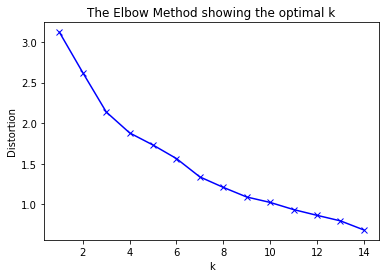

In [51]:
import matplotlib.pyplot as plt

distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(toronto_grouped_clustering)
    distortions.append(kmeanModel.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [53]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

ValueError: cannot insert Cluster Labels, already exists

In [56]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [57]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0  East Toronto               0           Coffee Shop     Health Food Store   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                   Pub          Neighborhood           Music Venue   

  6th Most Common Venue 7th Most Common Venue      8th Most Common Venue  \
0           Men's Store    Mexican Restaurant  Middle Eastern Restaurant   

  9th Most Common Venue      10th Most Common Venue  
0    Miscellaneous Shop  Modern European Restaurant

In [66]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
1       East Toronto               1      Greek Restaurant   
2       East Toronto               1                  Park   
3       East Toronto               1           Coffee Shop   
5    Central Toronto               1                   Gym   
6    Central Toronto               1        Clothing Store   
7    Central Toronto               1           Pizza Place   
9    Central Toronto               1           Coffee Shop   
11  Downtown Toronto               1           Coffee Shop   
12  Downtown Toronto               1      Sushi Restaurant   
13  Downtown Toronto               1           Coffee Shop   
14  Downtown Toronto               1           Coffee Shop   
15  Downtown Toronto               1           Coffee Shop   
16  Downtown Toronto               1        Sandwich Place   
17  Downtown Toronto               1           Coffee Shop   
18  Downtown Toronto               1           Coffee Shop   
19  Downtown Toronto               1           Coffee Shop   
20  Downtown Toronto               1           Coffee Shop   
21  Downtown Toronto               1           Coffee Shop   
22   Central Toronto               1           Music Venue   
24   Central Toronto               1        Sandwich Place   
25  Downtown Toronto               1                  Café   
26  Downtown Toronto               1                  Café   
27  Downtown Toronto               1       Airport Service   
28  Downtown Toronto               1        Sandwich Place   
29  Downtown Toronto               1           Coffee Shop   
30  Downtown Toronto               1         Grocery Store   
31      West Toronto               1                  Pool   
32      West Toronto               1                   Bar   
33      West Toronto               1        Breakfast Spot   
34      West Toronto               1    Mexican Restaurant   
35      West Toronto               1           Coffee Shop   
36      West Toronto               1           Coffee Shop   
37  Downtown Toronto               1           Coffee Shop   
38      East Toronto               1           Yoga Studio   

            2nd Most Common Venue  3rd Most Common Venue  \
1              Italian Restaurant            Coffee Shop   
2            Fast Food Restaurant             Playground   
3                       Gastropub                   Café   
5                  Breakfast Spot                  Hotel   
6                     Coffee Shop                  Diner   
7                             Gym            Coffee Shop   
9                     Pizza Place             Bagel Shop   
11                         Bakery            Pizza Place   
12            Japanese Restaurant             Restaurant   
13                           Park                    Pub   
14                 Sandwich Place         Clothing Store   
15             Italian Restaurant           Cocktail Bar   
16                         Bakery           Cocktail Bar   
17                 Sandwich Place       Sushi Restaurant   
18                           Café         Sandwich Place   
19                           Café                  Hotel   
20                           Café                  Hotel   
21                           Café         Sandwich Place   
22                           Pool   Fast Food Restaurant   
24                           Café            Coffee Shop   
25                    Coffee Shop         Sandwich Place   
26  Vegetarian / Vegan Restaurant            Coffee Shop   
27                 Airport Lounge       Airport Terminal   
28                    Coffee Shop                 Bakery   
29                 Sandwich Place                   Café   
30                           Café                   Park   
31                         Bakery              Pet Store   
32               Asian Restaurant  Vietnamese Restaurant   
33                 Sandwich Place                   Café   
34                           Café         

In [59]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
8  Central Toronto               2          Tennis Court   

  2nd Most Common Venue 3rd Most Common Venue     4th Most Common Venue  \
8            Restaurant        Adult Boutique  Mediterranean Restaurant   

  5th Most Common Venue 6th Most Common Venue      7th Most Common Venue  \
8           Men's Store    Mexican Restaurant  Middle Eastern Restaurant   

  8th Most Common Venue       9th Most Common Venue  \
8    Miscellaneous Shop  Modern European Restaurant   

            10th Most Common Venue  
8  Molecular Gastronomy Restaurant

In [60]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
10  Downtown Toronto               3                  Park   
23   Central Toronto               3                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
10            Playground                 Trail        Adult Boutique   
23                 Trail         Jewelry Store      Sushi Restaurant   

   5th Most Common Venue     6th Most Common Venue     7th Most Common Venue  \
10                Museum  Mediterranean Restaurant               Men's Store   
23        Adult Boutique             Movie Theater  Mediterranean Restaurant   

   8th Most Common Venue      9th Most Common Venue     10th Most Common Venue  
10    Mexican Restaurant  Middle Eastern Restaurant         Miscellaneous Shop  
23           Men's Store         Mexican Restaurant  Middle Eastern Restaurant

In [61]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
4  Central Toronto               4              Bus Line   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
4  Gym / Fitness Center                  Park           Swim School   

  5th Most Common Venue     6th Most Common Venue 7th Most Common Venue  \
4        Adult Boutique  Mediterranean Restaurant           Men's Store   

  8th Most Common Venue      9th Most Common Venue 10th Most Common Venue  
4    Mexican Restaurant  Middle Eastern Restaurant     Miscellaneous Shop